In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from otto_utils import *
from otto_features import *
from otto_candidates_covisit import *
from otto_lgbm_utils import *
from otto_implicit import *
from otto_reranker import *
from otto_jobs_candidates import *
from otto_jobs_datasets import *

# Dataset

## Orders

In [1]:
action_type = "orders"
mode = "train"
version = "+".join(["covisit_all", "tdidf_new_top_100", "tdidf_old_top_100"])
feature_groups = ["cand_user_item", "w2v_item2item", "covisit_item2item", "other"]

In [ ]:
df_stage_2_dataset = gather_dataset_features(
    mode = "train",
    action_type = "orders",
    version = version,
    feature_groups = feature_groups
)

In [ ]:
df_oof_preds = lgb_train_cv(
    df_dataset=df_stage_2_dataset,
    action_type=action_type,
    candidates_version=version,
)

In [12]:
df_stage_2_dataset = gather_dataset_features(
    mode = "train",
    action_type = "orders",
    version = "+".join(["covisit_all", "tdidf_new_top_100", "tdidf_old_top_100"]),
    feature_groups = ["cand_user_item", "w2v_item2item", "covisit_item2item", "other"]
)

mode:  train
action type:  orders
version:  covisit_all+tdidf_new_top_100+tdidf_old_top_100
Reading generated candidate file...:  reranker_finale/__stage2__train__orders__candidates_covisit_all+tdidf_new_top_100+tdidf_old_top_100.parquet


In [17]:
df_stage_2_dataset["target"].value_counts()

target,counts
i32,u32
0,27191735
1,207981


In [14]:
df_stage_2_dataset

session,aid,target,rank_orders,rank_carts,rank_clicks,tfidf_new_score,tfidf_old_score,i2i_new_score,i2i_old_score,w2v_cosine_sim_t_0_recent,w2v_cosine_sim_t_-1_recent,w2v_cosine_sim_t_-2_recent,w2v_cosine_sim_t_-3_recent,w2v_cosine_sim_t_-4_recent,w2v_cosine_sim_last_click_aid,w2v_cosine_sim_last_cart_aid,w2v_cosine_sim_last_order_aid,user_t_0_recent_carts_orders_weight,user_t_-1_recent_carts_orders_weight,user_t_-2_recent_carts_orders_weight,user_t_-3_recent_carts_orders_weight,user_t_-4_recent_carts_orders_weight,user_t_0_recent_buy2buy_weight,user_t_-1_recent_buy2buy_weight,user_t_-2_recent_buy2buy_weight,user_t_-3_recent_buy2buy_weight,user_t_-4_recent_buy2buy_weight,user_t_0_recent_click_weight,user_t_-1_recent_click_weight,user_t_-2_recent_click_weight,user_t_-3_recent_click_weight,user_t_-4_recent_click_weight,user_last_click_aid_carts_orders_weight,user_last_click_aid_buy2buy_weight,user_last_click_aid_click_weight,user_last_cart_aid_carts_orders_weight,user_last_cart_aid_buy2buy_weight,user_last_cart_aid_click_weight,user_last_order_aid_carts_orders_weight,user_last_order_aid_buy2buy_weight,user_last_order_aid_click_weight,user_lifetime_days,user_n_actions,user_n_uniq_items,user_buys_rate,user_uniq_clicks,user_uniq_carts,user_uniq_orders,cl_cnt,ca_cnt,or_cnt,user_ca_cl_ratio,user_or_cl_ratio,user_or_ca_ratio,item_lifetime_days,item_n_actions,item_n_uniq_users,item_buys_rate,item_uniq_clicks,item_uniq_carts,item_uniq_orders,cl_cnt_right,ca_cnt_right,or_cnt_right,item_ca_cl_ratio,item_or_cl_ratio,item_or_ca_ratio,item_n_sess_multi_clicks,item_n_sess_multi_carts,item_n_sess_multi_buys,user_item_log_recency_score,user_item_type_weighted_log_recency_score,user_item_is_in_history
i64,i64,i32,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32,i32,i32,i32,f64,f64,f64,f64,f64,f64,i32,f64,f64,i32,f64,f64,i32,f64,f64,u32,u32,f64,u32,u32,u32,u32,u32,u32,f64,f64,f64,f64,u32,u32,f64,u32,u32,u32,u32,u32,u32,f64,f64,f64,u32,u32,u32,f64,f64,i32
11107757,69701,1,1,1,1,1.003585,10.513677,1.0,10.0,1.0,0.937693,-999.0,-999.0,-999.0,1.0,-999.0,-999.0,0.0,8.0,0.0,0.0,0.0,0,0,0,0,0,0.0,37.502685,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.000712,2,2,0.0,2,0,0,2,0,0,0.0,0.0,0.0,26.755954,422,1,0.042654,299,9,2,406,14,2,0.034483,0.004926,0.142857,63,1,0,1.0,1.0,1
11107757,441214,0,2,2,2,0.121715,10.513677,0.071773,10.254678,0.937693,1.0,-999.0,-999.0,-999.0,0.937693,-999.0,-999.0,8.5,0.0,0.0,0.0,0.0,0,0,0,0,0,39.636885,0.0,0.0,0.0,0.0,8.5,0,39.636885,0.0,0,0.0,0.0,0,0.0,0.000712,2,2,0.0,2,0,0,2,0,0,0.0,0.0,0.0,27.937732,1509,1,0.051027,927,41,14,1446,49,14,0.033887,0.009682,0.285714,254,6,0,0.071773,0.071773,1
11107757,1522691,0,3,3,3,0.097666,1.426476,0.065949,0.755075,0.961893,0.938882,-999.0,-999.0,-999.0,0.961893,-999.0,-999.0,19.5,14.5,0.0,0.0,0.0,1,0,0,0,0,83.20263,75.2956,0.0,0.0,0.0,19.5,1,83.20263,0.0,0,0.0,0.0,0,0.0,0.000712,2,2,0.0,2,0,0,2,0,0,0.0,0.0,0.0,27.956197,4184,1,0.090822,1965,287,0,3804,380,0,0.099895,0.0,0.0,739,63,0,0.0,0.0,0
11107757,1777631,0,4,4,4,0.053125,2.174507,999.0,1.08279,0.961586,0.973794,-999.0,-999.0,-999.0,0.961586,-999.0,-999.0,23.5,163.0,0.0,0.0,0.0,0,4,0,0,0,61.517635,413.106546,0.0,0.0,0.0,23.5,0,61.517635,0.0,0,0.0,0.0,0,0.0,0.000712,2,2,0.0,2,0,0,2,0,0,0.0,0.0,0.0,27.942352,5716,1,0.098146,3018,252,114,5277,317,122,0.060072,0.023119,0.384858,998,42,8,0.0,0.0,0
11107757,416657,0,6,5,18,0.036277,1.256359,999.0,0.562457,0.947978,0.973103,-999.0,-999.0,-999.0,0.947978,-999.0,-999.0,4.5,40.0,0.0,0.0,0.0,0,0,0,0,0,18.822306,143.007482,0.0,0.0,0.0,4.5,0,18.822306,0.0,0,0.0,0.0,0,0.0,0.000712,2,2,0.0,2,0,0,2,0,0,0.0,0.0,0.0,27.828345,2411,1,0.075902,1162,138,0,2228,183,0,0.082136,0.0,0.0,425,31,0,0.0,0.0,0
11107757,1285692,0,7,6,20,999.0,0.852704,999.0,0.4709,0.925122,0.968489,-999.0,-999.0,-999.0,0.925122,-999.0,-999.0,4.0,33.0,0.0,0.0,0.0,0,0,0,0,0,19.797053,123.046124,0.0,0.0,0.0,4.0,0,19.797053,0.0,0,0.0,0.0,0,0.0,0.000712,2,2,0.0,2,0,0,2,0,0,0.0,0.0,0.0,27.935301,1500

In [41]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
#     'objective': 'binary',
    'objective': 'lambdarank',
    'metric': '"None"',
    'eval_at': 20,
#     'metric': {'auc', 'binary_logloss'},
#     'min_data_in_leaf': 256, 
#     'num_leaves': 63,
    'max_depth': 6,
    'learning_rate': 0.04,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.99,
#     'bagging_freq': 5,
#     'device': 'gpu',
    'lambda_l1': 0.2,
    'lambda_l2': 0.01,
    'verbose': -1,
    'num_threads': 44,
}

In [42]:
from datetime import datetime
from pathlib import Path
from collections import Counter

from joblib import Parallel, delayed
from tqdm.notebook import tqdm
import dill
import pandas as pd
import polars as pl
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.model_selection import GroupKFold

import lightgbm as lgb
import xgboost as xgb

import pytorch_lightning as L
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

from tasks.data.dataset.mappers import EntityEncoder
from tasks.jobs import Splitter

In [43]:
feature_cols = df_stage_2_dataset.drop(["session", "aid", "target"]).columns
print("num features: ", len(feature_cols))

num features:  71


In [44]:
skf = GroupKFold(n_splits=5)
df_valid_preds = df_stage_2_dataset.select(["session", "aid"])
version = "+".join(["covisit_all", "tdidf_new_top_100", "tdidf_old_top_100"])

for fold, (train_idx, valid_idx) in tqdm(enumerate(
    skf.split(df_stage_2_dataset,
              df_stage_2_dataset['target'],
              groups=df_stage_2_dataset['session'])
)):

    # contains sessions with no positives
    X_train = df_stage_2_dataset[train_idx][feature_cols].to_pandas()
    y_train = df_stage_2_dataset[train_idx]["target"].to_pandas()
    X_valid = df_stage_2_dataset[valid_idx][feature_cols].to_pandas()
    y_valid = df_stage_2_dataset[valid_idx]["target"].to_pandas()
    
    # create dataset for lightgbm
    groups_len_train = (
        df_stage_2_dataset[train_idx]
        .groupby("session").agg(pl.count("aid"))
        .sort("session")["aid"].to_numpy()
    )
    groups_len_valid = (
        df_stage_2_dataset[valid_idx]
        .groupby("session").agg(pl.count("aid"))
        .sort("session")["aid"].to_numpy()
    )    
    lgb_train = lgb.Dataset(X_train, y_train, group=groups_len_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, group=groups_len_valid, reference=lgb_train)
    
    # train model
    gbm_ranking = lgb.train(
        params, 
        lgb_train,
        num_boost_round=2000,
#         return_cvbooster=True,
        feval=lgb_numba_recall,
        valid_sets=lgb_eval,
        callbacks=[lgb.early_stopping(stopping_rounds=200), lgb.log_evaluation(period=20)]
    )
    
    scores = gbm_ranking.predict(X_valid)
    df_valid_preds_fold = (
        df_stage_2_dataset[valid_idx].select(["session", "aid"])
        .with_columns([pl.Series(scores).alias(f"scores_fold{fold}")])
    )
    df_valid_preds = (
        df_valid_preds.join(df_valid_preds_fold, on=["session", "aid"], how="left")
    )
    
    # add save models
    gbm_ranking.save_model(
        f"__model__orders_{version}_reranker_71feat_fold{fold}_v2.lgb"
    )

0it [00:00, ?it/s]

Training until validation scores don't improve for 200 rounds
[20]	valid_0's numba_recall@20: 0.899249
[40]	valid_0's numba_recall@20: 0.901848
[60]	valid_0's numba_recall@20: 0.903708
[80]	valid_0's numba_recall@20: 0.904471
[100]	valid_0's numba_recall@20: 0.906093
[120]	valid_0's numba_recall@20: 0.907023
[140]	valid_0's numba_recall@20: 0.907786
[160]	valid_0's numba_recall@20: 0.90843
[180]	valid_0's numba_recall@20: 0.908859
[200]	valid_0's numba_recall@20: 0.909074
[220]	valid_0's numba_recall@20: 0.909455
[240]	valid_0's numba_recall@20: 0.909884
[260]	valid_0's numba_recall@20: 0.910099
[280]	valid_0's numba_recall@20: 0.910385
[300]	valid_0's numba_recall@20: 0.910647
[320]	valid_0's numba_recall@20: 0.910767
[340]	valid_0's numba_recall@20: 0.91091
[360]	valid_0's numba_recall@20: 0.911291
[380]	valid_0's numba_recall@20: 0.911315
[400]	valid_0's numba_recall@20: 0.911554
[420]	valid_0's numba_recall@20: 0.911697
[440]	valid_0's numba_recall@20: 0.911649
[460]	valid_0's numb

[140]	valid_0's numba_recall@20: 0.909076
[160]	valid_0's numba_recall@20: 0.909605
[180]	valid_0's numba_recall@20: 0.910328
[200]	valid_0's numba_recall@20: 0.910569
[220]	valid_0's numba_recall@20: 0.911075
[240]	valid_0's numba_recall@20: 0.911099
[260]	valid_0's numba_recall@20: 0.911556
[280]	valid_0's numba_recall@20: 0.911749
[300]	valid_0's numba_recall@20: 0.911797
[320]	valid_0's numba_recall@20: 0.91199
[340]	valid_0's numba_recall@20: 0.911966
[360]	valid_0's numba_recall@20: 0.912375
[380]	valid_0's numba_recall@20: 0.912568
[400]	valid_0's numba_recall@20: 0.912761
[420]	valid_0's numba_recall@20: 0.913002
[440]	valid_0's numba_recall@20: 0.912978
[460]	valid_0's numba_recall@20: 0.913074
[480]	valid_0's numba_recall@20: 0.912929
[500]	valid_0's numba_recall@20: 0.913098
[520]	valid_0's numba_recall@20: 0.912881
[540]	valid_0's numba_recall@20: 0.912978
[560]	valid_0's numba_recall@20: 0.913026
[580]	valid_0's numba_recall@20: 0.91305
[600]	valid_0's numba_recall@20: 0.9

In [45]:
_ = calc_oof_score_for_type(df_valid_preds, act_type="orders")

100%|██████████| 120359/120359 [00:00<00:00, 269936.62it/s]


validation score: 0.39532928149196567
recall per type: type
carts    0.0000
clicks   0.0000
orders   0.6589
dtype: float64


In [24]:
skf = GroupKFold(n_splits=5)
df_valid_preds = df_stage_2_dataset.select(["session", "aid"])
version = "+".join(["covisit_all", "tdidf_new_top_100", "tdidf_old_top_100"])

for fold, (train_idx, valid_idx) in tqdm(enumerate(
    skf.split(df_stage_2_dataset,
              df_stage_2_dataset['target'],
              groups=df_stage_2_dataset['session'])
)):

    # contains sessions with no positives
    X_train = df_stage_2_dataset[train_idx][feature_cols].to_pandas()
    y_train = df_stage_2_dataset[train_idx]["target"].to_pandas()
    X_valid = df_stage_2_dataset[valid_idx][feature_cols].to_pandas()
    y_valid = df_stage_2_dataset[valid_idx]["target"].to_pandas()
    
    # create dataset for lightgbm
    groups_len_train = (
        df_stage_2_dataset[train_idx]
        .groupby("session").agg(pl.count("aid"))
        .sort("session")["aid"].to_numpy()
    )
    groups_len_valid = (
        df_stage_2_dataset[valid_idx]
        .groupby("session").agg(pl.count("aid"))
        .sort("session")["aid"].to_numpy()
    )    
    lgb_train = lgb.Dataset(X_train, y_train, group=groups_len_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, group=groups_len_valid, reference=lgb_train)
    
    # train model
    gbm_ranking = lgb.train(
        params, 
        lgb_train,
        num_boost_round=2000,
#         return_cvbooster=True,
        feval=lgb_numba_recall,
        valid_sets=lgb_eval,
        callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(period=20)]
    )
    
    scores = gbm_ranking.predict(X_valid)
    df_valid_preds_fold = (
        df_stage_2_dataset[valid_idx].select(["session", "aid"])
        .with_columns([pl.Series(scores).alias(f"scores_fold{fold}")])
    )
    df_valid_preds = (
        df_valid_preds.join(df_valid_preds_fold, on=["session", "aid"], how="left")
    )
    
    # add save models
    gbm_ranking.save_model(
        f"__model__orders_{version}_reranker_71feat_fold{fold}.lgb"
    )

0it [00:00, ?it/s]

Training until validation scores don't improve for 100 rounds
[20]	valid_0's numba_recall@20: 0.90335
[40]	valid_0's numba_recall@20: 0.905735
[60]	valid_0's numba_recall@20: 0.907476
[80]	valid_0's numba_recall@20: 0.908573
[100]	valid_0's numba_recall@20: 0.909145
[120]	valid_0's numba_recall@20: 0.90986
[140]	valid_0's numba_recall@20: 0.910314
[160]	valid_0's numba_recall@20: 0.910743
[180]	valid_0's numba_recall@20: 0.910981
[200]	valid_0's numba_recall@20: 0.911387
[220]	valid_0's numba_recall@20: 0.91153
[240]	valid_0's numba_recall@20: 0.91153
[260]	valid_0's numba_recall@20: 0.911864
[280]	valid_0's numba_recall@20: 0.912221
[300]	valid_0's numba_recall@20: 0.912293
[320]	valid_0's numba_recall@20: 0.912341
[340]	valid_0's numba_recall@20: 0.912341
[360]	valid_0's numba_recall@20: 0.912484
[380]	valid_0's numba_recall@20: 0.912555
[400]	valid_0's numba_recall@20: 0.912484
[420]	valid_0's numba_recall@20: 0.912245
[440]	valid_0's numba_recall@20: 0.912317
Early stopping, best i

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

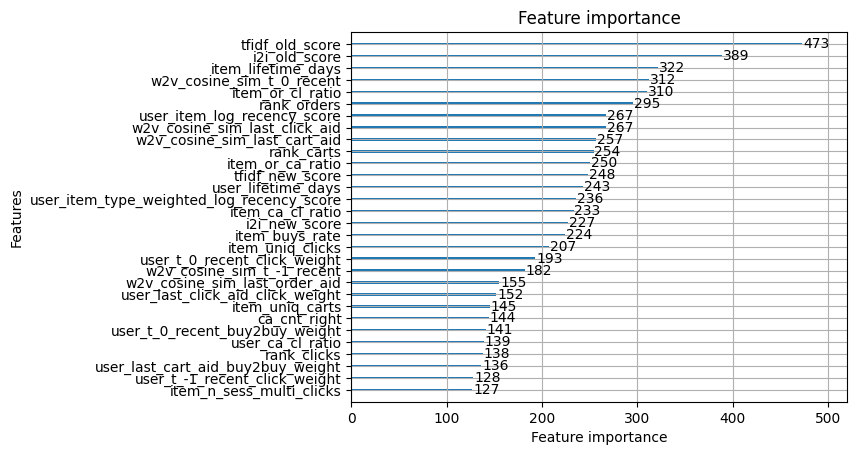

In [26]:
lgb.plot_importance(gbm_ranking, max_num_features=30)

In [25]:
_ = calc_oof_score_for_type(df_valid_preds, act_type="orders")

100%|██████████| 120359/120359 [00:00<00:00, 267263.20it/s]


validation score: 0.39532511864124553
recall per type: type
carts    0.0000
clicks   0.0000
orders   0.6589
dtype: float64


In [35]:
_ = calc_oof_score_for_type(df_valid_preds, act_type="orders")

100%|██████████| 120359/120359 [00:00<00:00, 266666.72it/s]


validation score: 0.42222809388282007
recall per type: type
orders   0.7037
dtype: float64


In [39]:
_ = calc_oof_score_for_type(df_valid_preds, act_type="orders")

100%|██████████| 120359/120359 [00:00<00:00, 266912.61it/s]


validation score: 0.38804429273166263
recall per type: type
carts    0.0000
clicks   0.0000
orders   0.6467
dtype: float64


## Carts

In [3]:
action_type = "carts"
mode = "train"
version = "+".join(["covisit_all",  "tdidf_new_top_100", "tdidf_old_top_100"])
feature_groups = ["cand_user_item", "w2v_item2item", "covisit_item2item", "other"]

In [4]:
df_stage_2_dataset = gather_dataset_features(
    mode = mode,
    action_type = action_type,
    version = version,
    feature_groups = feature_groups
)

mode:  train
action type:  carts
version:  covisit_all+tdidf_new_top_100+tdidf_old_top_100
Reading generated candidate file...:  reranker_finale/__stage2__train__carts__candidates_covisit_all+tdidf_new_top_100+tdidf_old_top_100.parquet


In [ ]:
df_oof_preds = lgb_train_cv(
    df_dataset=df_stage_2_dataset,
    action_type=action_type,
    candidates_version=version,
)

In [9]:
_ = calc_oof_score_for_type(df_oof_preds, act_type=action_type)

100%|██████████| 202061/202061 [00:00<00:00, 272274.93it/s]
/app/notebooks/otto/otto_utils.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_labels["ground_truth"].loc[labels_null_idx] = (
/app/notebooks/otto/otto_utils.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_labels["labels"].loc[labels_null_idx] = (


validation score: 0.12550463283727267
recall per type: type
carts    0.4183
clicks   0.0000
orders   0.0000
dtype: float64


## clicks

In [3]:
action_type = "clicks"
mode = "train"
# version = "+".join(["tdidf_new_top_200"])
# version = "+".join(["tdidf_new_top_100", "tdidf_old_top_100"])
version = "+".join(["covisit_all",  "tdidf_new_top_100", "tdidf_old_top_100"])
feature_groups = ["cand_user_item", "w2v_item2item", "covisit_item2item", "other"]

In [4]:
df_stage_2_dataset = gather_dataset_features(
    mode = mode,
    action_type = action_type,
    version = version,
    feature_groups = feature_groups
)

mode:  train
action type:  clicks
version:  covisit_all+tdidf_new_top_100+tdidf_old_top_100
Reading generated candidate file...:  reranker_finale/__stage2__train__clicks__candidates_covisit_all+tdidf_new_top_100+tdidf_old_top_100.parquet


In [ ]:
df_oof_preds = lgb_train_cv(
    df_dataset=df_stage_2_dataset,
    action_type=action_type,
    candidates_version=version,
    negative_sampling=50,
    model_version="v1",
)

num features:  71
Applying negative sampling...
Dataset shape before negative sampling:  (160779278, 74)
Dataset shape after negative sampling:  (42966620, 74)


0it [00:00, ?it/s]

Training until validation scores don't improve for 200 rounds
[20]	valid_0's numba_recall@20: 0.969196
Did not meet early stopping. Best iteration is:
[20]	valid_0's numba_recall@20: 0.969196


In [7]:
_ = calc_oof_score_for_type(df_oof_preds, act_type=action_type)

100%|██████████| 788846/788846 [00:02<00:00, 275852.37it/s]
/app/notebooks/otto/otto_utils.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_labels["ground_truth"].loc[labels_null_idx] = (
/app/notebooks/otto/otto_utils.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_labels["labels"].loc[labels_null_idx] = (


validation score: 0.05409307737332136
recall per type: type
carts    0.0000
clicks   0.5409
orders   0.0000
dtype: float64


In [3]:
action_type = "clicks"
mode = "train"
# version = "+".join(["tdidf_new_top_200"])
version = "+".join(["tdidf_new_top_100", "tdidf_old_top_100"])
feature_groups = ["cand_user_item", "w2v_item2item", "covisit_item2item", "other"]

In [4]:
df_stage_2_dataset = gather_dataset_features(
    mode = mode,
    action_type = action_type,
    version = version,
    feature_groups = feature_groups
)

mode:  train
action type:  clicks
version:  tdidf_new_top_100+tdidf_old_top_100
Reading generated candidate file...:  reranker_finale/__stage2__train__clicks__candidates_tdidf_new_top_100+tdidf_old_top_100.parquet


In [6]:
df_oof_preds = lgb_train_cv(
    df_dataset=df_stage_2_dataset,
    action_type=action_type,
    candidates_version=version,
)

num features:  71


0it [00:00, ?it/s]

Training until validation scores don't improve for 200 rounds
[20]	valid_0's numba_recall@20: 0.847587
[40]	valid_0's numba_recall@20: 0.852208
[60]	valid_0's numba_recall@20: 0.8552
[80]	valid_0's numba_recall@20: 0.85745
[100]	valid_0's numba_recall@20: 0.858578
[120]	valid_0's numba_recall@20: 0.859928
[140]	valid_0's numba_recall@20: 0.860936
[160]	valid_0's numba_recall@20: 0.861506
[180]	valid_0's numba_recall@20: 0.862102
[200]	valid_0's numba_recall@20: 0.862597
[220]	valid_0's numba_recall@20: 0.863205
[240]	valid_0's numba_recall@20: 0.863345
[260]	valid_0's numba_recall@20: 0.863864
[280]	valid_0's numba_recall@20: 0.864105
[300]	valid_0's numba_recall@20: 0.864283
[320]	valid_0's numba_recall@20: 0.864409
[340]	valid_0's numba_recall@20: 0.864676
[360]	valid_0's numba_recall@20: 0.864992
[380]	valid_0's numba_recall@20: 0.864992
[400]	valid_0's numba_recall@20: 0.865183
[420]	valid_0's numba_recall@20: 0.865468
[440]	valid_0's numba_recall@20: 0.865582
[460]	valid_0's numba

1it [38:44, 2324.02s/it]

Training until validation scores don't improve for 200 rounds
[20]	valid_0's numba_recall@20: 0.849464
[40]	valid_0's numba_recall@20: 0.853635
[60]	valid_0's numba_recall@20: 0.856906
[80]	valid_0's numba_recall@20: 0.859498
[100]	valid_0's numba_recall@20: 0.860702
[120]	valid_0's numba_recall@20: 0.862154
[140]	valid_0's numba_recall@20: 0.862857
[160]	valid_0's numba_recall@20: 0.863643
[180]	valid_0's numba_recall@20: 0.864195
[200]	valid_0's numba_recall@20: 0.864467
[220]	valid_0's numba_recall@20: 0.864898
[240]	valid_0's numba_recall@20: 0.865082
[260]	valid_0's numba_recall@20: 0.865481
[280]	valid_0's numba_recall@20: 0.865507
[300]	valid_0's numba_recall@20: 0.865684
[320]	valid_0's numba_recall@20: 0.865684
[340]	valid_0's numba_recall@20: 0.865836
[360]	valid_0's numba_recall@20: 0.866007
[380]	valid_0's numba_recall@20: 0.866096
[400]	valid_0's numba_recall@20: 0.866362
[420]	valid_0's numba_recall@20: 0.866692
[440]	valid_0's numba_recall@20: 0.866844
[460]	valid_0's nu

2it [57:37, 1623.74s/it]

Training until validation scores don't improve for 200 rounds
[20]	valid_0's numba_recall@20: 0.849356
[40]	valid_0's numba_recall@20: 0.853178
[60]	valid_0's numba_recall@20: 0.856347
[80]	valid_0's numba_recall@20: 0.858299
[100]	valid_0's numba_recall@20: 0.860042
[120]	valid_0's numba_recall@20: 0.861063
[140]	valid_0's numba_recall@20: 0.861817
[160]	valid_0's numba_recall@20: 0.862565
[180]	valid_0's numba_recall@20: 0.863015
[200]	valid_0's numba_recall@20: 0.863383
[220]	valid_0's numba_recall@20: 0.863858
[240]	valid_0's numba_recall@20: 0.864143
[260]	valid_0's numba_recall@20: 0.86453
[280]	valid_0's numba_recall@20: 0.864891
[300]	valid_0's numba_recall@20: 0.865056
[320]	valid_0's numba_recall@20: 0.865176
[340]	valid_0's numba_recall@20: 0.865531
[360]	valid_0's numba_recall@20: 0.865734
[380]	valid_0's numba_recall@20: 0.866045
[400]	valid_0's numba_recall@20: 0.866108
[420]	valid_0's numba_recall@20: 0.866279
[440]	valid_0's numba_recall@20: 0.866286
[460]	valid_0's num

3it [1:26:17, 1667.77s/it]

Training until validation scores don't improve for 200 rounds
[20]	valid_0's numba_recall@20: 0.849406
[40]	valid_0's numba_recall@20: 0.854388
[60]	valid_0's numba_recall@20: 0.857304
[80]	valid_0's numba_recall@20: 0.859725
[100]	valid_0's numba_recall@20: 0.861646
[120]	valid_0's numba_recall@20: 0.862837
[140]	valid_0's numba_recall@20: 0.863712
[160]	valid_0's numba_recall@20: 0.864295
[180]	valid_0's numba_recall@20: 0.864992
[200]	valid_0's numba_recall@20: 0.864973
[220]	valid_0's numba_recall@20: 0.865221
[240]	valid_0's numba_recall@20: 0.865392
[260]	valid_0's numba_recall@20: 0.865639
[280]	valid_0's numba_recall@20: 0.866064
[300]	valid_0's numba_recall@20: 0.866387
[320]	valid_0's numba_recall@20: 0.866628
[340]	valid_0's numba_recall@20: 0.866926
[360]	valid_0's numba_recall@20: 0.867135
[380]	valid_0's numba_recall@20: 0.867255
[400]	valid_0's numba_recall@20: 0.867433
[420]	valid_0's numba_recall@20: 0.867712
[440]	valid_0's numba_recall@20: 0.867819
[460]	valid_0's nu

4it [2:02:48, 1874.32s/it]

Training until validation scores don't improve for 200 rounds
[20]	valid_0's numba_recall@20: 0.847758
[40]	valid_0's numba_recall@20: 0.852633
[60]	valid_0's numba_recall@20: 0.855485
[80]	valid_0's numba_recall@20: 0.857862
[100]	valid_0's numba_recall@20: 0.859053
[120]	valid_0's numba_recall@20: 0.860226
[140]	valid_0's numba_recall@20: 0.860936
[160]	valid_0's numba_recall@20: 0.861411
[180]	valid_0's numba_recall@20: 0.862109
[200]	valid_0's numba_recall@20: 0.862654
[220]	valid_0's numba_recall@20: 0.862952
[240]	valid_0's numba_recall@20: 0.863408
[260]	valid_0's numba_recall@20: 0.863744
[280]	valid_0's numba_recall@20: 0.864073
[300]	valid_0's numba_recall@20: 0.864137
[320]	valid_0's numba_recall@20: 0.864359
[340]	valid_0's numba_recall@20: 0.864561
[360]	valid_0's numba_recall@20: 0.86479
[380]	valid_0's numba_recall@20: 0.864935
[400]	valid_0's numba_recall@20: 0.865037
[420]	valid_0's numba_recall@20: 0.865151
[440]	valid_0's numba_recall@20: 0.865221
[460]	valid_0's num

5it [2:32:36, 1831.28s/it]


In [7]:
_ = calc_oof_score_for_type(df_oof_preds, act_type=action_type)

100%|██████████| 788846/788846 [00:02<00:00, 275852.37it/s]
/app/notebooks/otto/otto_utils.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_labels["ground_truth"].loc[labels_null_idx] = (
/app/notebooks/otto/otto_utils.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_labels["labels"].loc[labels_null_idx] = (


validation score: 0.05409307737332136
recall per type: type
carts    0.0000
clicks   0.5409
orders   0.0000
dtype: float64


In [6]:
params = {
    "verbosity": 0,
    'objective':'rank:pairwise',
    "eval_metric": "map@20",
    'tree_method':'gpu_hist',
    "gpu_id": 1,
    "booster": "gbtree",
    "lambda": 0.02,
    "alpha": 0.001,
    "subsample": 0.8,
    "sampling_method": "gradient_based",
}

In [10]:
def fit_cv_xgb(df_stage_2_dataset, params):
    skf = GroupKFold(n_splits=5)
    df_valid_preds = df_stage_2_dataset.select(["session", "aid"])
    
    feature_cols = df_stage_2_dataset.drop(["session", "aid", "target"]).columns
    print("num features: ", len(feature_cols))

    for fold, (train_idx, valid_idx) in tqdm(enumerate(
        skf.split(df_stage_2_dataset,
                  df_stage_2_dataset['target'],
                  groups=df_stage_2_dataset['session'])
    )):

        X_train = df_stage_2_dataset[train_idx][feature_cols].to_pandas()
        y_train = df_stage_2_dataset[train_idx]["target"].to_pandas()
        X_valid = df_stage_2_dataset[valid_idx][feature_cols].to_pandas()
        y_valid = df_stage_2_dataset[valid_idx]["target"].to_pandas()

        # group lengths for ranking
        groups_len_train = (
            df_stage_2_dataset[train_idx]
            .groupby("session").agg(pl.count("aid"))
            .sort("session")["aid"].to_numpy()
        )
        groups_len_valid = (
            df_stage_2_dataset[valid_idx]
            .groupby("session").agg(pl.count("aid"))
            .sort("session")["aid"].to_numpy()
        )
        dtrain = xgb.DMatrix(X_train, y_train, group=groups_len_train) 
        dvalid = xgb.DMatrix(X_valid, y_valid, group=groups_len_valid)

        model = xgb.train(
            params, 
            dtrain=dtrain,
            evals=[(dvalid,'valid')],
            num_boost_round=2000,
            early_stopping_rounds=200,
            verbose_eval=100,
            callbacks=callbacks,
        )
    
        scores = model.predict(dvalid)
        df_valid_preds_fold = (
            df_stage_2_dataset[valid_idx].select(["session", "aid"])
            .with_columns([pl.Series(scores).alias(f"scores_fold{fold}")])
        )
        df_valid_preds = df_valid_preds.join(df_valid_preds_fold, on=["session", "aid"], how="left")
    
    return df_valid_preds

In [11]:
import xgboost as xgb

In [ ]:
df_oof_preds = fit_cv_xgb(df_stage_2_dataset, params)

num features:  71


0it [00:00, ?it/s]

In [ ]:
dtrain = xgb.DMatrix(X_train, y_train, group=groups_len_train) 
dvalid = xgb.DMatrix(X_valid, y_valid, group=groups_len_valid)

model = xgb.train(
    params, 
    dtrain=dtrain,
    evals=[(dvalid,'valid')],
    num_boost_round=2000,
    early_stopping_rounds=200,
    verbose_eval=100,
    callbacks=callbacks,
)